# Transpile any library

Transpile the `kornia` library to `jax` with just one line of code.

⚠️ If you are running this notebook in Colab, you will have to install `Ivy` and some dependencies manually. You can do so by running the cell below ⬇️

If you want to run the notebook locally but don't have Ivy installed just yet, you can check out the [Get Started section of the docs.](https://unify.ai/docs/ivy/overview/get_started.html)

In [1]:
!pip install ivy
!pip install kornia

In previous tutorials, we demonstrated how to transpile simple functions from one framework to another using `ivy.transpile`. However, in real-world scenarios, you often need to access all functions from a specific library. Fortunately, the transpiler is capable of doing just that. Let's explore a simple example where we convert the `kornia` library from `torch` to `jax`.

First, let's import everything we need:

In [2]:
import ivy
import kornia
import requests
import jax
import jax.numpy as jnp
import numpy as np
from PIL import Image

Now we can transpile the library to `jax`. Since it's not practical to specify arguments for every function, we'll transpile it lazily.

In [3]:
jax.config.update('jax_enable_x64', True)
jax_kornia = ivy.transpile(kornia, source="torch", to="jax")

/workspaces/ivy/ivy/utils/exceptions.py:390: UserWarning: The current backend: 'jax' does not support inplace updates natively. Ivy would quietly create new arrays when using inplace updates with this backend, leading to memory overhead (same applies for views). If you want to control your memory management, consider doing ivy.set_inplace_mode('strict') which should raise an error whenever an inplace update is attempted with this backend.
  warnings.warn(


Let's load a sample image and convert it to the format expected by kornia. Keep in mind that even though the operations will be performed in `jax`, the transpiler traces a computational graph, so we still need to use `kornia`'s data format.

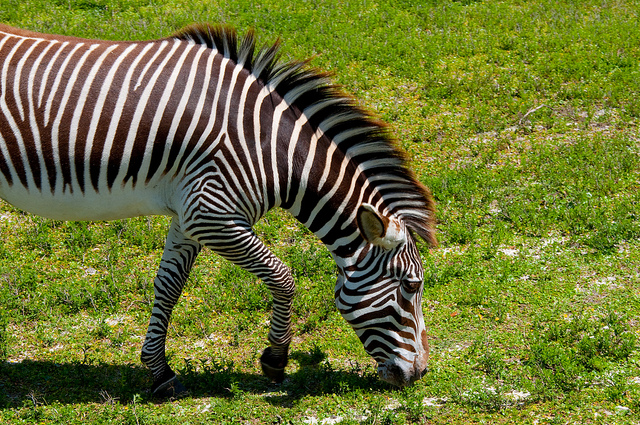

In [4]:
url = "http://images.cocodataset.org/train2017/000000000034.jpg"
raw_img = Image.open(requests.get(url, stream=True).raw)
img = jnp.transpose(jnp.array(raw_img), (2, 0, 1))
img = jnp.expand_dims(img, 0) / 255
display(raw_img)

Now that we have our sample image, we can easily call any `kornia` function using our transpiled version of the library, `jax_kornia`. As expected, both inputs and outputs of this function are `jax.Array` instances.

In [5]:
out = jax_kornia.enhance.sharpness(img, 10)
type(out)

jaxlib.xla_extension.ArrayImpl

Finally, we can verify that the transformation has been applied correctly!

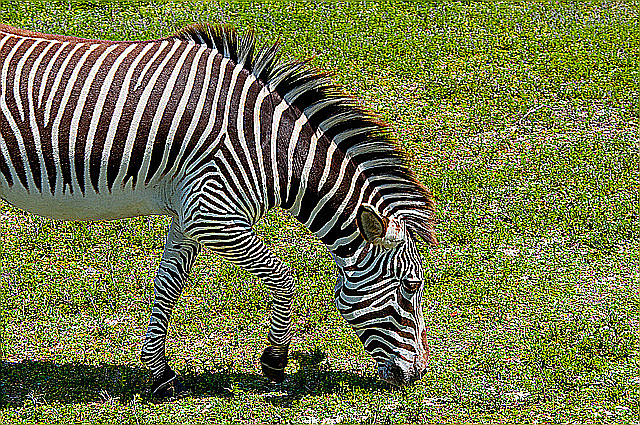

In [6]:
np_image = np.uint8(np.array(out[0])*255)
display(Image.fromarray(np.transpose(np_image, (1, 2, 0))))

## Round Up

Congratulations! 🎉 You are now capable of using any array computing library in your preferred framework leveraging `ivy.transpile`. In the next tutorial, we will explore how to convert trainable modules and layers from one framework to another ➡️